In [1]:
import pandas as pd

playing = pd.read_csv('lecture_playing.csv')
attention = pd.read_csv('lecture_study.csv')

In [2]:
playing.columns

Index(['Unnamed: 0', 'device_time_stamp', 'system_time_stamp',
       'left_gaze_point_on_display_area',
       'left_gaze_point_in_user_coordinate_system', 'left_gaze_point_validity',
       'left_pupil_diameter', 'left_pupil_validity',
       'left_gaze_origin_in_user_coordinate_system',
       'left_gaze_origin_in_trackbox_coordinate_system',
       'left_gaze_origin_validity', 'right_gaze_point_on_display_area',
       'right_gaze_point_in_user_coordinate_system',
       'right_gaze_point_validity', 'right_pupil_diameter',
       'right_pupil_validity', 'right_gaze_origin_in_user_coordinate_system',
       'right_gaze_origin_in_trackbox_coordinate_system',
       'right_gaze_origin_validity', 'type'],
      dtype='object')

In [3]:
def process_dataframe(df):
    validity_columns = [col for col in df.columns if 'validity' in col]
    df = df[~(df[validity_columns] == 0).any(axis=1)]

    columns_to_drop = ['Unnamed: 0', 'device_time_stamp']
    
    df = df.drop(columns=columns_to_drop)
    df = df.drop(columns=validity_columns)

    return df

playing = process_dataframe(playing)

In [4]:
len(playing)

67

In [5]:
attention = process_dataframe(attention)
len(attention)

70

In [6]:
attention.head()

,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_pupil_diameter,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_trackbox_coordinate_system,right_gaze_point_on_display_area,right_gaze_point_in_user_coordinate_system,right_pupil_diameter,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_trackbox_coordinate_system,type
1,234325505322,"(0.3902299404144287, 0.22102828323841095)","(-20.710163116455078, 94.43382263183594, 23.72...",6.127548,"(-53.713531494140625, 71.48236846923828, 540.4...","(0.6380926966667175, 0.32117921113967896, 0.23...","(0.39578506350517273, 0.20653682947158813)","(-19.66208267211914, 96.03956604003906, 24.313...",5.571762,"(7.0902323722839355, 70.39753723144531, 532.87...","(0.48238450288772583, 0.32036489248275757, 0.2...",attentive
2,234326322066,"(0.3442767560482025, 0.23836946487426758)","(-29.380077362060547, 92.51229858398438, 23.02...",5.316513,"(-53.49250793457031, 70.94564819335938, 539.01...","(0.6379539966583252, 0.3219744861125946, 0.227...","(0.33694472908973694, 0.22752206027507782)","(-30.76340675354004, 93.71427154541016, 23.467...",4.803879,"(7.121840953826904, 69.8153076171875, 530.0720...","(0.4821878969669342, 0.32077693939208984, 0.20...",attentive
3,234327138792,"(0.5531566143035889, 0.1360979825258255)","(10.028975486755371, 103.84464263916016, 27.15...",5.971329,"(-51.338748931884766, 71.3678970336914, 538.17...","(0.6326903104782104, 0.32060056924819946, 0.22...","(0.5517945885658264, 0.15609338879585266)","(9.772001266479492, 101.62902069091797, 26.348...",5.353287,"(9.341079711914062, 69.89582824707031, 529.729...","(0.4763599932193756, 0.32041096687316895, 0.20...",attentive
4,234327938777,"(0.4668678045272827, 0.1377553790807724)","(-6.250999450683594, 103.6609878540039, 27.087...",4.832809,"(-50.63351058959961, 70.8510513305664, 534.554...","(0.6319035887718201, 0.3205339312553406, 0.217...","(0.44676584005355835, 0.11045153439044952)","(-10.04361629486084, 106.68643951416016, 28.18...",4.403000,"(10.192587852478027, 69.09444427490234, 527.07...","(0.4739699959754944, 0.3214294910430908, 0.195...",attentive
5,234328738752,"(0.3680771589279175, 0.012991138733923435)","(-24.88969612121582, 117.48568725585938, 32.11...",4.385178,"(-53.37376403808594, 71.46726989746094, 534.00...","(0.6391441226005554, 0.31878554821014404, 0.21...","(0.376843124628067, -0.002389084780588746)","(-23.235830307006836, 119.1899185180664, 32.73...",4.103104,"(7.3470306396484375, 70.13516998291016, 525.51...","(0.4814140200614929, 0.3182191252708435, 0.192...",attentive


In [7]:
from matplotlib import pyplot as plt

def get_gazepoints(df, side = "left"):
    
    col_name = side + "_gaze_point_on_display_area"

    coordinate_pattern = r'\((-?\d+\.\d+), (-?\d+\.\d+)\)'

    # Extract coordinates from the text using regex
    df['coordinates'] = df[col_name].str.findall(coordinate_pattern)

    # Flatten the list of coordinates and separate into x and y columns
    x_col = 'x_' + side
    y_col = 'y_' + side
    df[[x_col, y_col]] = pd.DataFrame(df['coordinates'].apply(lambda x: x[0] if x else [None, None]).tolist(), index=df.index)

    df = df.drop(columns = ['coordinates', col_name])
    
    columns_to_drop = [col for col in df.columns if 'coordinate' in col and side in col]
    df = df.drop(columns=columns_to_drop)
    
    return df
   
    
attention = get_gazepoints(attention)
attention = get_gazepoints(attention, 'right')
attention.head()

,system_time_stamp,left_pupil_diameter,right_pupil_diameter,type,x_left,y_left,x_right,y_right
1,234325505322,6.127548,5.571762,attentive,0.3902299404144287,0.22102828323841095,0.39578506350517273,0.20653682947158813
2,234326322066,5.316513,4.803879,attentive,0.3442767560482025,0.23836946487426758,0.33694472908973694,0.22752206027507782
3,234327138792,5.971329,5.353287,attentive,0.5531566143035889,0.1360979825258255,0.5517945885658264,0.15609338879585266
4,234327938777,4.832809,4.403000,attentive,0.4668678045272827,0.1377553790807724,0.44676584005355835,0.11045153439044952
5,234328738752,4.385178,4.103104,attentive,0.3680771589279175,0.012991138733923435,0.376843124628067,-0.002389084780588746


In [8]:
playing = get_gazepoints(playing)
playing = get_gazepoints(playing, 'right')
playing.head()

,system_time_stamp,left_pupil_diameter,right_pupil_diameter,type,x_left,y_left,x_right,y_right
0,235263399664,6.055298,5.378387,not_attentive,0.9220501780509949,0.38943639397621155,0.9583590030670166,0.4517311155796051
1,235264216391,5.924210,5.206833,not_attentive,0.937659740447998,0.40336185693740845,0.9629191160202026,0.4608020782470703
2,235265016402,5.999908,5.333969,not_attentive,0.6806125044822693,0.09549836814403534,0.6736785769462585,0.1398603618144989
7,235269074864,5.384308,4.684967,not_attentive,0.6417545676231384,0.39122870564460754,0.587100088596344,0.411627858877182
8,235269891562,5.808853,4.976837,not_attentive,0.8797707557678223,0.5117112994194031,0.8840470314025879,0.5320276021957397


In [9]:
def convert_columns_to_float(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')

columns_to_convert = ['x_left', 'y_left', 'x_right', 'y_right']
convert_columns_to_float(playing, columns_to_convert)
convert_columns_to_float(attention, columns_to_convert)

In [10]:
# for each 5, average diameters, average pos's, and velocity
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def calculate_grouped_statistics(df):
    output_df = pd.DataFrame()
        
    num_rows = len(df)
    for i in range(num_rows - 4):
        group = df.iloc[i:i+5]

        avg_left_pupil_diameter = group['left_pupil_diameter'].mean()
        avg_right_pupil_diameter = group['right_pupil_diameter'].mean()
        avg_x_left = group['x_left'].mean()
        avg_x_right = group['x_right'].mean()
        avg_y_left = group['y_left'].mean()
        avg_y_right = group['y_right'].mean()

        max_x_velocity = max(group['x_left'].diff().max(), group['x_right'].diff().max())
        max_y_velocity = max(group['y_left'].diff().max(), group['y_right'].diff().max())

        output_df = output_df.append({
            'avg_left_pupil_diameter': avg_left_pupil_diameter,
            'avg_right_pupil_diameter': avg_right_pupil_diameter,
            'avg_x_left': avg_x_left,
            'avg_x_right': avg_x_right,
            'avg_y_left': avg_y_left,
            'avg_y_right': avg_y_right,
            'max_x_velocity': max_x_velocity,
            'max_y_velocity': max_y_velocity
        }, ignore_index=True)

    return output_df

playing_data = calculate_grouped_statistics(playing)

In [14]:
playing_data['attention'] = 0
playing_data.head()

,avg_left_pupil_diameter,avg_right_pupil_diameter,avg_x_left,avg_x_right,avg_y_left,avg_y_right,max_x_velocity,max_y_velocity,attention
0,5.834515,5.116199,0.812370,0.813221,0.358247,0.399210,0.296947,0.295730,0
1,5.791794,5.061090,0.752636,0.746743,0.442204,0.483820,0.296947,0.342753,0
2,5.767273,5.043829,0.821521,0.842855,0.398167,0.423876,0.817512,0.342753,0
3,5.671509,4.945984,0.780856,0.800995,0.466406,0.490338,0.817512,0.342753,0
4,5.766986,5.029468,0.807206,0.839737,0.478620,0.505431,0.817512,0.342753,0


In [15]:
attention_data = calculate_grouped_statistics(attention)
attention_data['attention'] = 1
attention_data.head()

,avg_left_pupil_diameter,avg_right_pupil_diameter,avg_x_left,avg_x_right,avg_y_left,avg_y_right,max_x_velocity,max_y_velocity,attention
0,5.326675,4.847006,0.424522,0.421627,0.149248,0.139643,0.214850,0.020985,1
1,5.016977,4.582312,0.412907,0.409586,0.106333,0.094816,0.214850,0.001657,1
2,4.907361,4.489511,0.424378,0.423772,0.060120,0.036587,0.072292,0.001657,1
3,4.645102,4.295447,0.392028,0.392556,0.029953,-0.000072,0.072292,0.036429,1
4,4.629916,4.305722,0.367548,0.371637,0.014795,-0.013086,0.072292,0.076700,1


In [16]:
df = pd.concat([attention_data, playing_data], ignore_index=True)
df.head()

,avg_left_pupil_diameter,avg_right_pupil_diameter,avg_x_left,avg_x_right,avg_y_left,avg_y_right,max_x_velocity,max_y_velocity,attention
0,5.326675,4.847006,0.424522,0.421627,0.149248,0.139643,0.214850,0.020985,1
1,5.016977,4.582312,0.412907,0.409586,0.106333,0.094816,0.214850,0.001657,1
2,4.907361,4.489511,0.424378,0.423772,0.060120,0.036587,0.072292,0.001657,1
3,4.645102,4.295447,0.392028,0.392556,0.029953,-0.000072,0.072292,0.036429,1
4,4.629916,4.305722,0.367548,0.371637,0.014795,-0.013086,0.072292,0.076700,1


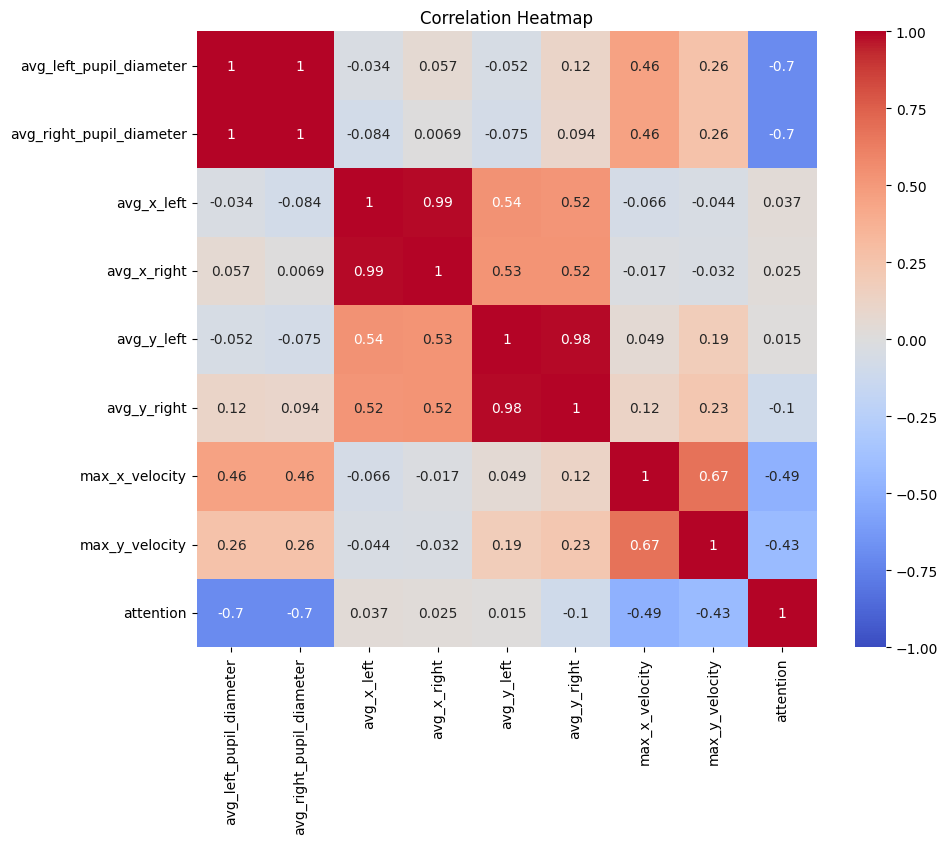

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Correlation Heatmap")

plt.show()

In [20]:
y = df['attention']
X = df.drop('attention', axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))

103
26


In [23]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9230769230769231
